In [16]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [17]:
def load_hungary_graph(path_to_csv="data/hungary_county_edges.csv"):
    df = pd.read_csv(path_to_csv)
    g = nx.from_pandas_edgelist(df, source="name_1", target="name_2")
    return g


def load_hungary_dataset(g, path_to_csv="data/hungary_chickenpox.csv"):
    df = pd.read_csv(path_to_csv)
    from_node_to_id = dict(zip(g.nodes(), range(len(g.nodes()))))
    X, y = [], []
    for t, row_dict in enumerate(df.to_dict(orient="records")):
        for v in g.nodes():
            X.append([from_node_to_id[v], t])
            y.append(row_dict[v])

    g = nx.relabel_nodes(g, from_node_to_id)
    return np.array(X), np.array(y), g, from_node_to_id

def plot_nodes_with_colors(g, signal, title="", layout=nx.spring_layout, ax=None):
    if layout is None:
        layout = nx.spring_layout

    nodes = g.nodes()
    assert len(nodes) == len(signal)

    # drawing nodes and edges separately so we can capture collection for colobar
    pos = layout(g)
    nx.draw_networkx_edges(g, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=signal,
                                node_size=100, cmap=plt.cm.jet, ax=ax)
    plt.title(title)
    plt.colorbar(nc)
    plt.axis('off')

In [39]:
graph = load_hungary_graph()
graph.remove_edges_from(nx.selfloop_edges(graph))
X, y, graph, node_ids = load_hungary_dataset(graph)

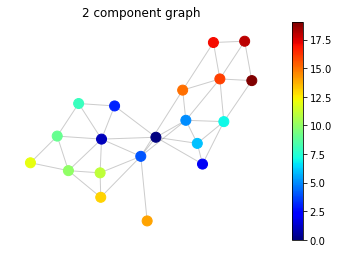

In [40]:
plot_nodes_with_colors(graph, np.arange(len(graph)))